In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
daily_shifts_fpath = "../../WdwByDay_Output/All_pats_dayily_centroid_shifts.csv"
daily_shifts_df = pd.read_csv(daily_shifts_fpath)
daily_shifts_df

,PatID,DayNr,N3,N2,N1,REM,Wake
0,pat_FR_253,0->1,15.394804,8.062258,2.000000,1.414214,15.033296
1,pat_FR_253,1->2,4.898979,9.110434,5.830952,10.246951,8.062258
2,pat_FR_253,2->3,1.000000,5.916080,5.385165,8.124038,8.062258
3,pat_FR_253,3->4,5.196152,8.306624,5.385165,14.282857,11.445523
4,pat_FR_253,4->5,7.681146,9.539392,20.124612,12.529964,10.049876
5,pat_FR_253,5->6,20.396078,3.000000,10.198039,25.159491,6.164414
6,pat_FR_970,0->1,3.316625,2.828427,3.741657,3.605551,19.646883
7,pat_FR_970,1->2,3.316625,3.316625,32.634338,18.384776,12.247449
8,pat_FR_970,2->3,3.741657,4.000000,3.162278,2.236068,12.409674
9,pat_FR_1084,0->1,1.000000,4.123106,1.732051,6.557439,5.099020


<Axes: >

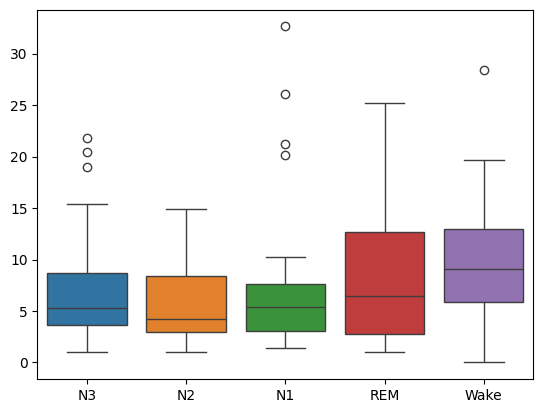

In [3]:
sns.boxplot(data=daily_shifts_df[['N3','N2','N1','REM','Wake']])

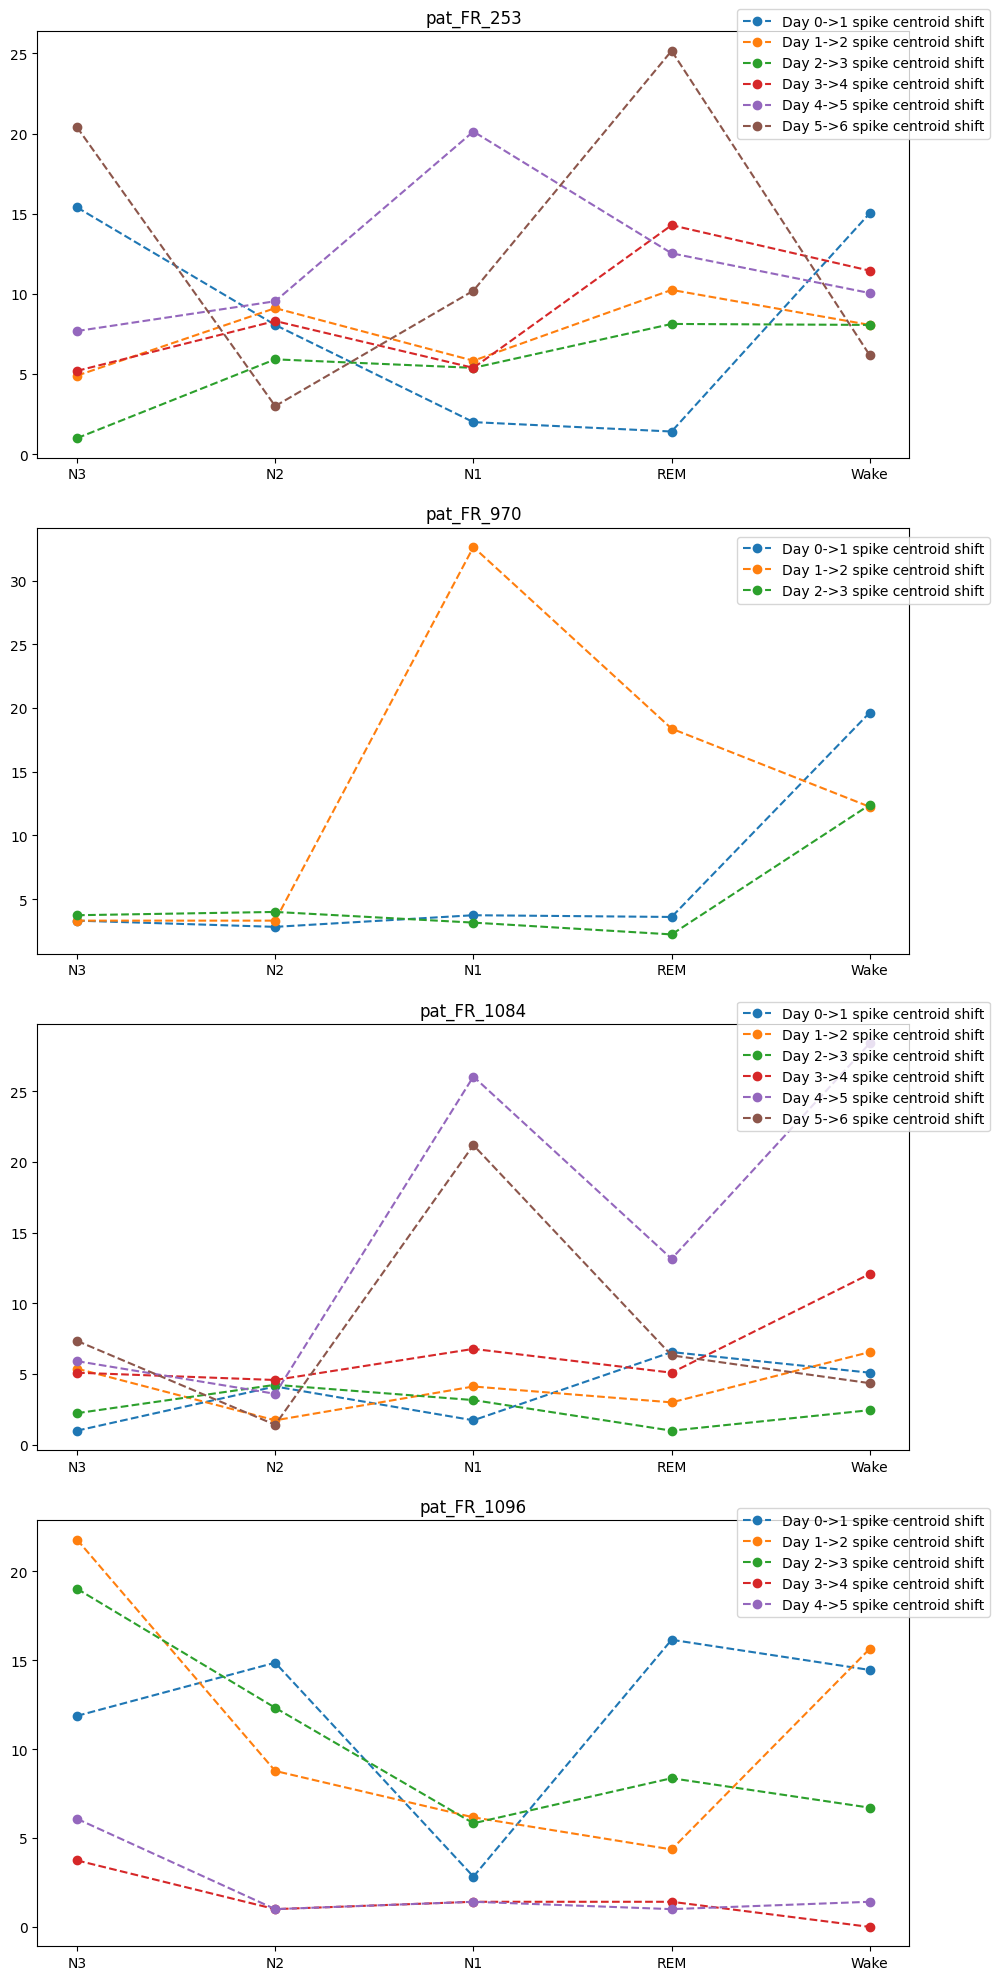

In [4]:
sleep_stages = ['N3','N2','N1','REM','Wake']
pats_list = daily_shifts_df.PatID.unique()
fig, axs = plt.subplots(len(pats_list), 1, figsize=(10, 20))

for pidx, pat_id in enumerate(pats_list):
    pat_df = daily_shifts_df[daily_shifts_df.PatID==pat_id]
    for day in pat_df.DayNr:
        day_data = pat_df[pat_df.DayNr==day][sleep_stages]
        axs[pidx].plot(sleep_stages, day_data.to_numpy().flatten(), 'o--', label=f"Day {day} spike centroid shift")
    axs[pidx].legend(loc='right',bbox_to_anchor=(1.1, 0.9))
    axs[pidx].set_title(pat_id)
plt.tight_layout()

In [5]:
ps_ls = []
for stage in ['N1', 'N2', 'N3']:
    a = daily_shifts_df[stage].to_numpy()
    b = daily_shifts_df.Wake.to_numpy()
    res = stats.ttest_rel(a, b, axis=0)
    ps_ls.append(res.pvalue)
    #print(f"{stage} vs Wake, pvalue: {res.pvalue:.6f}")

fdr_corr_p_ls = stats.false_discovery_control(ps_ls)
for sti, stage in enumerate(['N1', 'N2', 'N3']):
    print(f"{stage} vs Wake, pvalue: {fdr_corr_p_ls[sti]:.6f}")

N1 vs Wake, pvalue: 0.457823
N2 vs Wake, pvalue: 0.029257
N3 vs Wake, pvalue: 0.379484


In [6]:
ps_ls = []
for stage in ['N1', 'N2', 'N3']:
    a = daily_shifts_df[stage].to_numpy()
    b = daily_shifts_df.Wake.to_numpy()
    res = stats.wilcoxon(a, b, axis=0)
    ps_ls.append(res.pvalue)
    #print(f"{stage} vs Wake, pvalue: {res.pvalue:.6f}")

fdr_corr_p_ls = stats.false_discovery_control(ps_ls)
for sti, stage in enumerate(['N1', 'N2', 'N3']):
    print(f"{stage} vs Wake, pvalue: {fdr_corr_p_ls[sti]:.6f}")

N1 vs Wake, pvalue: 0.230513
N2 vs Wake, pvalue: 0.014580
N3 vs Wake, pvalue: 0.230513


# The daily spike centroid shift is higher in Wakefulness than in N2

In [7]:
sleep_stages = ['N3','N2','N1','REM','Wake']
for i_a in range(len(sleep_stages)):
    stage_a = sleep_stages[i_a]
    for i_b in range(i_a+1, len(sleep_stages)):
        stage_b = sleep_stages[i_b]
        print(f"{stage_a} vs. {stage_b}")
        a = daily_shifts_df[stage_a].to_numpy()
        b = daily_shifts_df[stage_b].to_numpy()
        res = stats.ttest_rel(a, b, axis=0)
        print(f"pvalue: {res.pvalue:.6f}")

N3 vs. N2
pvalue: 0.117799
N3 vs. N1
pvalue: 0.774860
N3 vs. REM
pvalue: 0.824203
N3 vs. Wake
pvalue: 0.252989
N2 vs. N1
pvalue: 0.228687
N2 vs. REM
pvalue: 0.108396
N2 vs. Wake
pvalue: 0.009752
N1 vs. REM
pvalue: 0.851608
N1 vs. Wake
pvalue: 0.457823
REM vs. Wake
pvalue: 0.323930
